In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math
from termcolor import colored
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

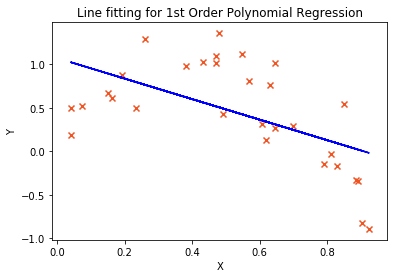

 Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -
 [[ 1.06902915 -1.17653632]]
 Q.1-1 - 1st Order Polynomial Regression, RMSE is - RMSE is - 0.3367611044189652


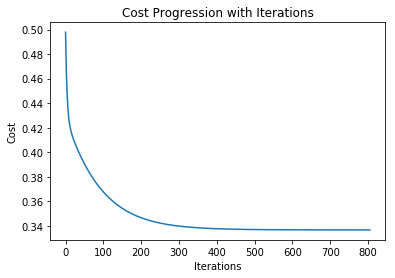

In [2]:
# Q.1-1 - 1st Order Polynomial Regression

# Reading data
data1 = pd.read_csv('ex2data1.csv', sep=",", encoding='utf-8', header='infer')
df = data1.copy()

def get_rmse(x, y, beta):
    m = len(x)
    inner = np.power(((x * beta.T) - y), 2)
    return math.sqrt(np.sum(inner) / (2 * m))

def drawPlot(Xcord, Ycord, y_pred, order, title, xlabel, ylabel):
    plt.scatter(Xcord, Ycord, c='#ef5423', marker='x')
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    temp = 'Line' if order == 1 else 'Curve'
    order = '1st' if order == 1 else '2nd' if order ==2 else '3rd' if order == 3 else str(order)+'th'
    plt.title( temp + ' fitting for ' + order + ' Order Polynomial Regression' + title)
    plt.plot(Xcord, y_pred, c='blue')
    plt.show()
    
def plotCostHistory(cost_history):
     plt.plot(cost_history)
     plt.ylabel('Cost');
     plt.xlabel('Iterations');
     plt.title('Cost Progression with Iterations')
     plt.show()
    
def normalizeData(df, needSort, byColumn, yColumn):
    if(needSort):
        df = df.sort_values(by=[byColumn]) # sort values for plotting sane graph
    Y = df[[yColumn]]
    X = df.drop([yColumn], axis=1)
    #print('----Before norm-----')
    #print(X)
    X = (X-X.mean())/X.std()
    #print('----After norm-----')
    #print(X)
    X.insert(0,-1,1)# inserting ones column for beta0
    return X, Y

def gradientDescentUsingMatrix(x, y, beta, learning_rate, iters):  
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(iters):
        error = (x * beta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = beta[0,j] - ((learning_rate / len(x)) * np.sum(term))
            
        beta = temp
        old_cost = new_cost
        new_cost = get_rmse(x, y, beta)
        if(abs(old_cost - new_cost) < 0.0000001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print ("cost : " + str(new_cost))
        cost[i] = str(new_cost)
        cost_history.append(new_cost)
    return beta, cost_history, new_cost

df.insert(0,-1,1)# inserting ones column for beta0
Y = df[['y']]
X = df.drop(['y'], axis=1)

X =  np.matrix(X.values)
Y =  np.matrix(Y.values)

beta = np.matrix(np.zeros(X.shape[1]))
beta, costs, rmse = gradientDescentUsingMatrix(X, Y, beta, 0.1, 100000)
y_pred = X * beta.T
drawPlot(df['x'], df['y'], y_pred, 1, '', 'X', 'Y');
print(" Q.1-1 - 1st Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-1 - 1st Order Polynomial Regression, RMSE is - " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

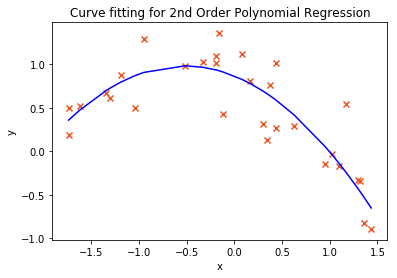

 Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.15045635 -1.53187134]]
 Q.1-2 - 2nd Order Polynomial Regression, RMSE is - RMSE is - 0.20202301509602702


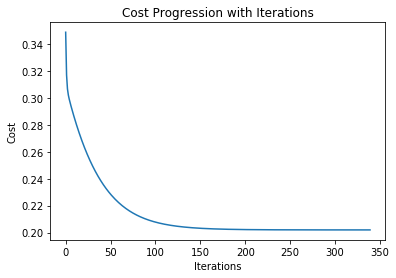

In [3]:
# Q.1-2 - 2nd Order Polynomial Regression

def generatePolynomialInput(df, order, xheader):
    for i in range(2,order+1):
        df[i] = df[xheader]**i
    return df

def performPolynomialRegression(df, learning_rate, iters, order, xheader, yheader, plt_title, draw):
    beta = np.matrix(np.zeros(order+1))
    #print(df.head())
    normalized_df_poly = generatePolynomialInput(df, order, xheader)
    #print(normalized_df_poly.head())
    X, Y = normalizeData(normalized_df_poly, True, xheader, yheader); # Normalize the data for proper scaling
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    beta, costs, rmse = gradientDescentUsingMatrix(XM, YM, beta, learning_rate, iters)
    y_pred = XM * beta.T
    if(draw):
        drawPlot(Xcord, Ycord, y_pred, order, plt_title, xheader, yheader);
    return beta, rmse, costs, X

df = data1;
beta, rmse, costs, X = performPolynomialRegression(df, 0.5, 10000, 2, 'x', 'y', '', True)
print(" Q.1-2 - 2nd Order Polynomial Regression, Optimized Weights are -\n",beta)
print(" Q.1-2 - 2nd Order Polynomial Regression, RMSE is - " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

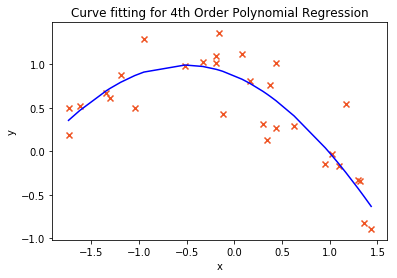

 Q.1-3 - 4th Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.10039392 -1.17681667 -0.6637961   0.36229393]]
 Q.1-3 - 4th Order Polynomial Regression, RMSE is - RMSE is - 0.20207035442606053


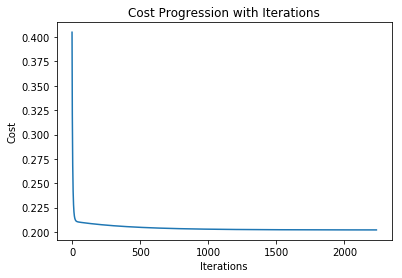

In [4]:
# Q.1-3 - 4th Order Polynomial Regression

# Normalize the data for proper scaling
df = data1;
beta, rmse, costs, X= performPolynomialRegression(df, 0.5, 10000, 4, 'x', 'y', '', True)
print(" Q.1-3 - 4th Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-3 - 4th Order Polynomial Regression, RMSE is - " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

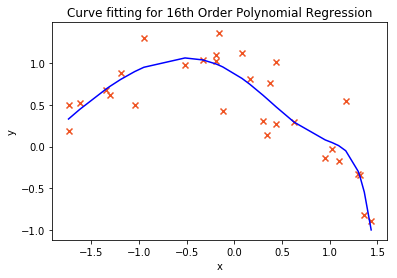

 Q.1-4 - 16th Order Polynomial Regression, Optimized Weights are -
 [[ 0.45269151  1.05509834 -0.59245275 -0.90636536 -0.66605292 -0.28806158
   0.05427814  0.30171812  0.44372399  0.48908118  0.45304357  0.35183622
   0.20044085  0.01185074 -0.20302971 -0.43522176 -0.67742135]]
 Q.1-4 - 16th Order Polynomial Regression, RMSE is - 0.18622226845119225


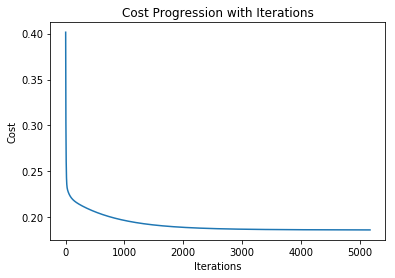

In [5]:
# Q.1-4 - 16th Order Polynomial Regression

df = data1;
beta, rmse, costs, X= performPolynomialRegression(df, 0.1, 10000, 16, 'x', 'y', '', True)
print(" Q.1-4 - 16th Order Polynomial Regression, Optimized Weights are -\n", beta)
print(" Q.1-4 - 16th Order Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

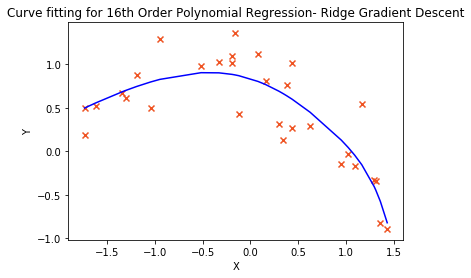

 Q.1-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -
 [[ 0.45118755  0.53544948 -0.25366544 -0.39991202 -0.31344868 -0.17349449
  -0.0462667   0.04756403  0.10507794  0.12988115  0.12751364  0.10359459
   0.06313313  0.01033896 -0.05135959 -0.1192208  -0.19107637]]
 Q.1-5 - 16th Order Ridge Polynomial Regression, RMSE is - 0.20578065471208168


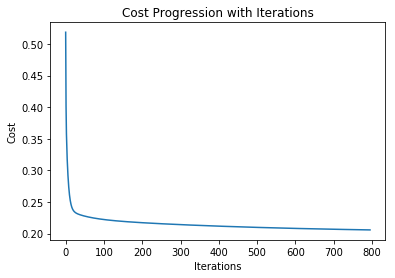

In [6]:
#Q.1-5 16th Order Ridge Polynomial Regression

def get_rmse2(x, y, beta, lamda):
    m = len(x)
    inner = np.power(((x * beta) - y), 2)
    sq_sum = np.sum(inner)
    cost = (1/(2*m)) * (sq_sum + (lamda * np.sum(np.power(beta,2))))
    return math.sqrt(cost)

def ridgeGradientDescent(X, Y, alpha, iters, lamda):
    x=np.matrix(X)
    y=np.matrix(Y)
    m, n = np.shape(X)
    beta = np.matrix(np.zeros(n)).transpose()
    XT = x.transpose()
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(0, iters):
        y_new = np.dot(X, beta)
        error = y_new - y
        old_cost = new_cost
        new_cost = get_rmse2(np.matrix(X), y, beta, lamda)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        cost_history.append(new_cost)
        #print("iteration:", i, "RMSE:", str(new_cost))
        old_gradient = np.dot(XT, error) / m
        temp = alpha * (old_gradient + (lamda/m)*beta)
        beta = beta - temp
    return beta, new_cost, cost_history

def performRidgePolynomialRegression(df, learning_rate, iters, order, lamda, xheader, yheader, draw):
    beta = np.matrix(np.zeros(order+1))
    #print(df.head())
    normalized_df_poly = generatePolynomialInput(df, order, xheader)
    #print(normalized_df_poly.head())
    X, Y = normalizeData(normalized_df_poly, True,xheader, yheader); # Normalize the data for proper scaling
    XM = np.matrix(X.values)
    YM = np.matrix(Y.values)
    Xcord = list(XM[:,1].flat)
    Ycord = list(YM[:,0].flat)
    beta, rmse, costs = ridgeGradientDescent(X, Y, learning_rate, iters, lamda)
    y_pred = XM * beta
    if(draw):
        drawPlot(Xcord, Ycord, y_pred, order,'- Ridge Gradient Descent', 'X', 'Y');
    return beta, rmse, costs

df = data1;
beta, rmse, costs = performRidgePolynomialRegression(df, 0.1, 10000, 16, 0.1, 'x', 'y', True)
print(" Q.1-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -\n", beta.ravel())
print(" Q.1-5 - 16th Order Ridge Polynomial Regression, " + colored('RMSE is - ' + str(rmse), 'green'))
plotCostHistory(costs)

Q. 1-6. 16th Order Polynomial Regression SKlearn Ridge model, Optimized Weights are
[[ 0.          0.0545361  -0.02729518 -0.05646995 -0.06182051 -0.05785865
  -0.05092652 -0.04369792 -0.03722955 -0.03186236 -0.02762572 -0.02442212
  -0.02211184 -0.02055078 -0.01960609 -0.01916153 -0.01911805]]
 Q.1-6 - 16th Order Polynomial Regression SKlearn Ridge model, RMSE is - 0.3948726678402371


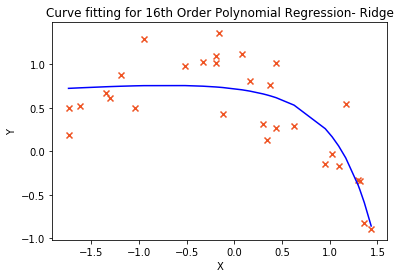

In [7]:
# 1-6 16th Order Polynomial Regression scikit-learn Ridge model

df = data1;
normalized_df_poly = generatePolynomialInput(df, 16, 'x')
X, Y = normalizeData(normalized_df_poly, True, 'x', 'y'); # Normalize the data for proper scaling
# this Alpha(Regularization Strength) value gives the lowest cost
clf = Ridge(alpha=10, copy_X = True, fit_intercept = True, max_iter = None, normalize=False, 
      random_state=None, solver ='auto', tol=0.001)
clf.fit(X,Y)

beta = clf.coef_
Ypred = clf.predict(X)

print("Q. 1-6. 16th Order Polynomial Regression SKlearn Ridge model, Optimized Weights are\n" + str(beta))
print(" Q.1-6 - 16th Order Polynomial Regression SKlearn Ridge model, " + colored('RMSE is - ' + str(get_rmse(np.matrix(X), np.matrix(Y), beta)), 'green'))
XM = np.matrix(X.values)
YM = np.matrix(Y.values)
Xcord = list(XM[:,1].flat)
Ycord = list(YM[:,0].flat)
drawPlot(Xcord, Ycord, Ypred, 16, "- Ridge", 'X', 'Y')

Q. 1-7. 16th Order Polynomial Regression SKlearn Lasso model, Optimized Weights are -
  (0, 6)	-0.37838914501
 Q.1-7 - 16th Order Polynomial Regression SKlearn Lasso model, RMSE is - 0.40253562451212455


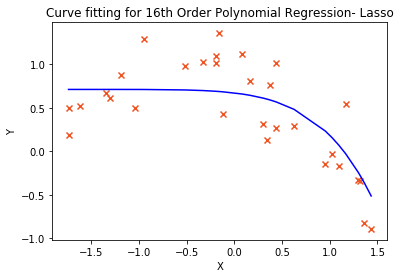

In [8]:
# 1-7 16th Order Polynomial Regression scikit-learn Lasso model

df = data1;
normalized_df_poly = generatePolynomialInput(df, 16, 'x')
X, Y = normalizeData(normalized_df_poly, True, 'x', 'y'); # Normalize the data for proper scaling
# this Alpha(Regularization Strength) value gives the lowest cost
clf = Lasso(alpha=0.1, copy_X = True, fit_intercept = True, max_iter = 1000000, normalize=False, 
      positive=False, precompute=False, random_state=None, selection = 'cyclic', tol=0.0001, warm_start=False)
clf.fit(X,Y)

beta = clf.sparse_coef_
Ypred = clf.predict(X)

print("Q. 1-7. 16th Order Polynomial Regression SKlearn Lasso model, Optimized Weights are -\n" + str(beta))
print(" Q.1-7 - 16th Order Polynomial Regression SKlearn Lasso model, " + colored('RMSE is - ' + str(get_rmse(np.matrix(X), np.matrix(Y), beta)), 'green'))
XM = np.matrix(X.values)
YM = np.matrix(Y.values)

Xcord = list(XM[:,1].flat)
Ycord = list(YM[:,0].flat)

drawPlot(Xcord, Ycord, Ypred, 16, "- Lasso", 'X', 'Y')

In [9]:
# Reading data for Q.2
data2 = pd.read_csv('ex2data2.csv', sep=",", encoding='utf-8', header='infer')
df = data2
def split_data_test_train_val(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    return X_train, X_val, X_test, y_train, y_val, y_test

def insertDummies(X_train, X_val, X_test):
    # inserting ones column for beta0
    X_train.insert(0,-1,1)
    X_val.insert(0,-1,1)
    X_test.insert(0,-1,1)
    return X_train, X_val, X_test

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data_test_train_val(df[['sqft_living']], df[['price']])

   alpha  rmse_diff
0  0.010        0.0
1  0.100        0.0
2  0.001        0.0


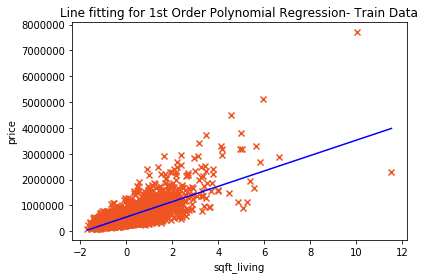

 Q.2-1 - 1st Order Ridge Polynomial Regression, Optimized Weights are -
 [[ 551410.18262527  297675.02276913]]
 Q.2-1 - 1st Order Ridge Polynomial Regression, Train RMSE is - 194323.42159017947
 Q.2-1 - 1st Order Ridge Polynomial Regression, Test RMSE is - 357545.72992393473


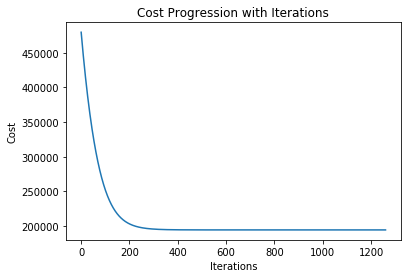

In [10]:
# Q.2-1 1st Order Polynomal Regression with Test, Train and Validation data
df = data2;
def perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 
                                                 order, xheader, yheader):
    alpha = [0.01, 0.1, 0.001]
    scores = pd.DataFrame(columns=['alpha','rmse_diff'])
    i=0
    for a in alpha:
        betaTrain, rmseTrain, costsTrain, x = performPolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                            a, 100000, order, xheader, yheader,'', False)

        betaVal, rmseVal, costsVal, x = performPolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                            a, 100000, order, xheader, yheader,'', False)
        scores.loc[i] = pd.Series({'alpha':a, 'rmse_diff':abs(rmseTrain-rmseVal)})
        i=i+1
    print(scores)
    least_rmse_comb = scores['rmse_diff'].idxmin()
    alp = scores.iloc[[least_rmse_comb]]['alpha'][0]
    betaTrain, rmseTrain, costsTrain, x = performPolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                                alp, 100000, order, xheader, yheader, '- Train Data', True)
    return betaTrain, rmseTrain, costsTrain, x



betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 1, 
                                                 'sqft_living', 'price')

rmseTest = get_rmse(np.matrix(Xtr), np.matrix(y_train), betaTrain)
print(" Q.2-1 - 1st Order Ridge Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-1 - 1st Order Ridge Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-1 - 1st Order Ridge Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)



   alpha  rmse_diff
0  0.010        0.0
1  0.100        0.0
2  0.001        0.0


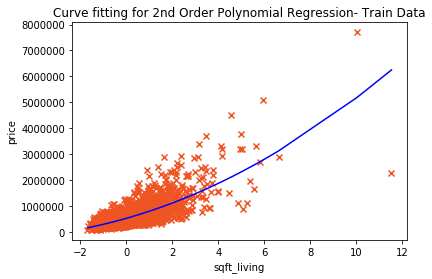

 Q.2-1 - 2nd Order Ridge Polynomial Regression, Optimized Weights are -
 [[ 551411.89300173  162958.75975738  148813.24286026]]
 Q.2-1 - 2nd Order Ridge Polynomial Regression, Train RMSE is - 189113.8397894255
 Q.2-1 - 2nd Order Ridge Polynomial Regression, Test RMSE is - 359959.26065670105


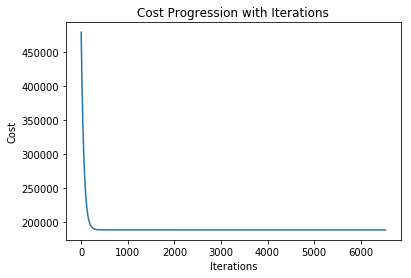

In [11]:
# Q.2-2 2nd Order Polynomal Regression with Test, Train and Validation data
betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 2, 
                                                 'sqft_living', 'price')

rmseTest = get_rmse(np.matrix(Xtr), np.matrix(y_train), betaTrain)
print(" Q.2-2 - 2nd Order Ridge Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-2 - 2nd Order Ridge Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-2 - 2nd Order Ridge Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)



   alpha  rmse_diff
0  0.010        0.0
1  0.100        0.0
2  0.001        0.0


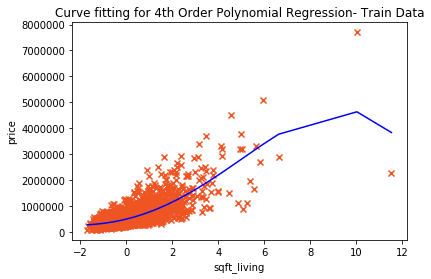

 Q.2-3 - 3rd Order Ridge Polynomial Regression, Optimized Weights are -
 [[ 551411.89300173   16162.92480232  254322.15213293  309553.26291839
  -334635.78958934]]
 Q.2-3 - 3rd Order Ridge Polynomial Regression, Train RMSE is - 182923.49596243078
 Q.2-3 - 3rd Order Ridge Polynomial Regression, Test RMSE is - 363057.08353966585


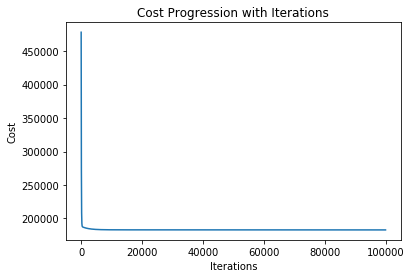

In [14]:
# Q.2-3 4th Order Polynomal Regression with Test, Train and Validation data
betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, 
                                                                          y_test, 4, 'sqft_living', 'price')

rmseTest = get_rmse(np.matrix(Xtr), np.matrix(y_train), betaTrain)
print(" Q.2-3 - 4th Order Ridge Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-3 - 4th Order Ridge Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-3 - 4th Order Ridge Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)

In [ ]:
# Q.2-4 16th Order Polynomal Regression with Test, Train and Validation data
betaTrain, rmseTrain, costsTrain, Xtr = perform_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, 
                                                                          y_test, 16, 'sqft_living', 'price')

rmseTest = get_rmse(np.matrix(Xtr), np.matrix(y_train), betaTrain)
print(" Q.2-4 - 16th Order Ridge Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-4 - 16th Order Ridge Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
print(" Q.2-4 - 16th Order Ridge Polynomial Regression, " + colored('Test RMSE is - ' + str(rmseTest), 'green'))
plotCostHistory(costsTrain)

   alpha  rmse_diff
0  0.010        0.0
1  0.100        0.0
2  0.001        0.0


   alpha  lamda  rmse_diff
0  0.010    0.1        0.0
1  0.100    0.1        0.0
2  0.001    0.1        0.0
3  0.010    1.0        0.0
4  0.100    1.0        0.0
5  0.001    1.0        0.0
6  0.010   10.0        0.0
7  0.100   10.0        0.0
8  0.001   10.0        0.0


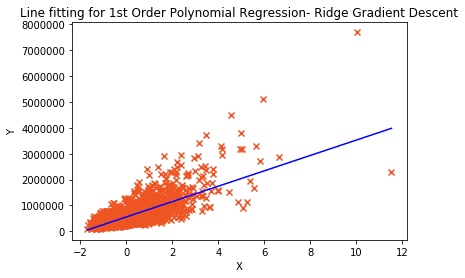

 Q.2-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -
 [[ 551378.867459    297658.09054585]]
 Q.2-5 - 16th Order Ridge Polynomial Regression, Train RMSE is - 194338.02985459124


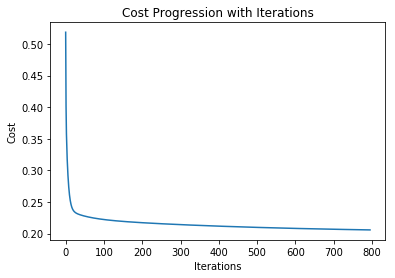

In [12]:
# Q.2-5 16th Order Ridge Polynomal Regression with Test, Train and Validation data
df = data2;
def perform_Ridge_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 
                                                 order, xheader, yheader):
    lamda = [0.1, 1, 10]
    alpha = [0.01, 0.1, 0.001]
    scores = pd.DataFrame(columns=['alpha','lamda','rmse_diff'])
    i=0
    for l in lamda:
        for a in alpha:       
            betaTrain, rmseTrain, costsTrain = performRidgePolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                                a, 100000, order, l, xheader, yheader, False)
            
            betaVal, rmseVal, costsVal = performRidgePolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                                a, 100000, order, l, xheader, yheader, False)
            scores.loc[i] = pd.Series({'alpha':a, 'lamda':l, 'rmse_diff':abs(rmseTrain-rmseVal)})
            i=i+1
    print(scores)
    least_rmse_comb = scores['rmse_diff'].idxmin()
    alp = scores.iloc[[least_rmse_comb]]['alpha'][0]
    lam = scores.iloc[[least_rmse_comb]]['lamda'][0]
    betaTrain, rmseTrain, costsTrain = performRidgePolynomialRegression(pd.concat([X_train, y_train], axis=1),
                                                                alp, 100000, order, lam, xheader, yheader, True)
    return betaTrain, rmseTrain, costsTrain


# 'sqft_living', 'price', '- Train Data'

betaTrain, rmseTrain, costsTrain = perform_Ridge_Polynomial_Regression_val(X_train, X_val, X_test, y_train, y_val, y_test, 1, 
                                                 'sqft_living', 'price')
print(" Q.2-5 - 16th Order Ridge Polynomial Regression, Optimized Weights are -\n", betaTrain.ravel())
print(" Q.2-5 - 16th Order Ridge Polynomial Regression, " + colored('Train RMSE is - ' + str(rmseTrain), 'green'))
plotCostHistory(costs)
